In [ ]:
#Data Science CA1 code
#Topic: Cryptocurrency Data analysis and prediction
#Group: Chi ieong Ng C00223421, Jonathan Suryadiputra C00235450, Weihao Liao C00253515
#Submission Date: 18 Feb 2022

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
from prophet import Prophet

In [ ]:
# Prophet module

In [ ]:
#Bitcoin

In [4]:
#use panda to import bitcoin daily rates data from csv file
df_btc = pd.read_csv("Gemini_BTCUSD_day.csv", usecols = ['Date','Close'])

In [5]:
df_btc.index = df_btc.index[::-1]
df_btc = df_btc.reindex(index=df_btc.index[::-1])
df_date = [None] * len(df_btc['Date'])
for index, i in enumerate(df_btc['Date']):
   df_date[index] = i[6:10] + '-'+ i[3:5] + '-' + i[0:2]
df_btc['Date'] = df_date

In [6]:
df_btc['Date']

0       2015-10-08
1       2015-10-09
2       2015-10-10
3       2015-10-11
4       2015-10-12
           ...    
2320    2022-02-13
2321    2022-02-14
2322    2022-02-15
2323    2022-02-16
2324    2022-02-17
Name: Date, Length: 2325, dtype: object

In [7]:
df_btc.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)

In [8]:
df_btc.head()

,ds,y
0,2015-10-08,243.60
1,2015-10-09,245.51
2,2015-10-10,246.30
3,2015-10-11,248.98
4,2015-10-12,245.75


In [9]:
model_btc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'additive', growth = 'linear')
model_btc.fit(df_btc)

Initial log joint probability = -43.429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4514.82      0.012961        947.04      0.1814           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4534.07    0.00472807       248.278      0.7535      0.7535      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4543.85    0.00383178       114.593      0.3904           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       4544.58   0.000294477       158.737   2.267e-06       0.001      464  LS failed, Hessian reset 
     399       4544.71   1.20411e-05       72.1348           1           1      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     457       4545.23   0.000427096     

37  LS failed, Hessian reset 
     499       4545.44   0.000675345       88.3652           1           1      692   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       4545.59   7.16618e-06       69.9628           1           1      812   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     638       4545.59   8.40934e-06       67.2528   1.463e-07       0.001      909  LS failed, Hessian reset 
     688        4545.6   6.27089e-07       64.1418      0.2449           1      968   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [10]:
future1_btc = model_btc.make_future_dataframe(periods = 365)
forecast1_btc = model_btc.predict(future1_btc)

In [11]:
forecast1_btc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2685,2023-02-13,85549.705478,77142.900482,94637.594634
2686,2023-02-14,85917.693650,77700.635238,95116.288154
2687,2023-02-15,86280.482158,77587.929241,95394.179047
2688,2023-02-16,86634.877833,78356.479044,95994.739892
2689,2023-02-17,86977.887944,77818.500212,95942.542528


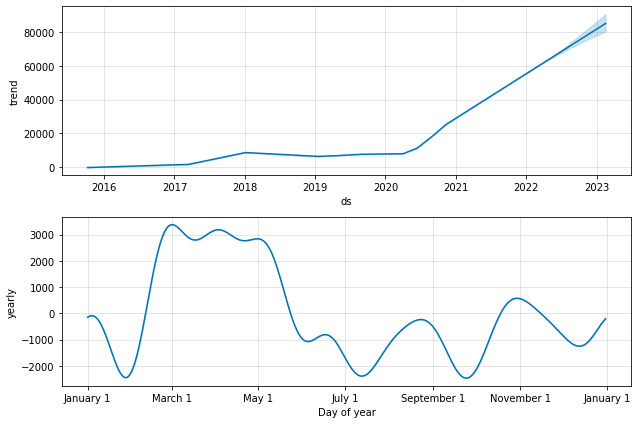

In [12]:
#bitcoin's trend and seasonality in yearly
fig1_btc = model_btc.plot_components(forecast1_btc)

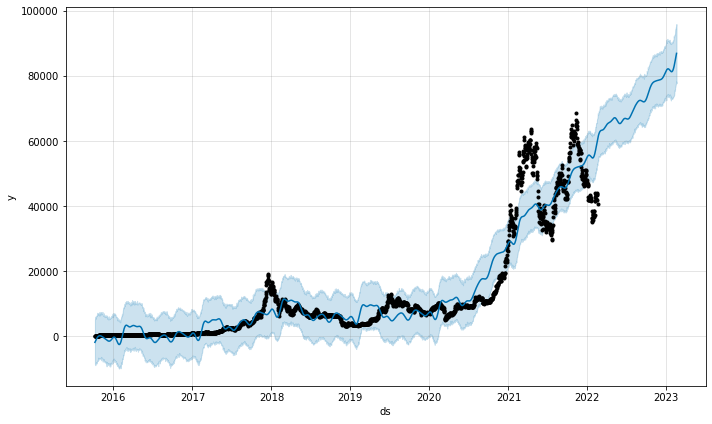

In [13]:
#additive model
fig2_btc = model_btc.plot(forecast1_btc)

Initial log joint probability = -43.429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5306.48    0.00231495       599.842      0.2879      0.2879      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5372.12     0.0106981       390.326      0.7957      0.7957      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5382.36    0.00043137       189.159      0.5343      0.5343      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       5384.53    0.00021468         236.2   1.465e-06       0.001      454  LS failed, Hessian reset 
     399       5385.87   0.000127861       102.922      0.3754      0.3754      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     424       5387.47   0.000824096     

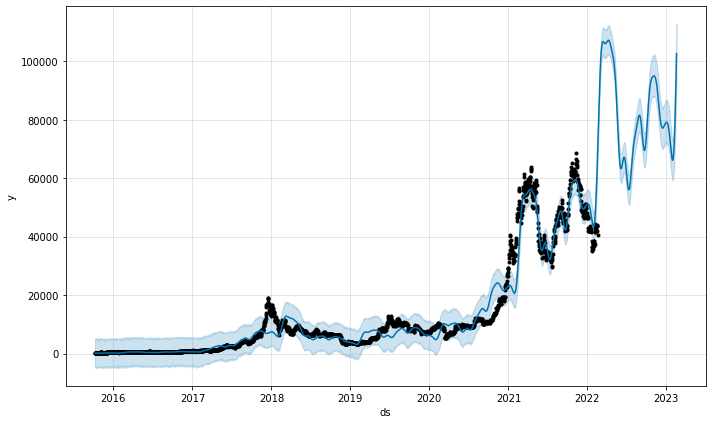

In [15]:
#multiplicative model
model2_btc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2_btc.fit(df_btc)
future2_btc = model2_btc.make_future_dataframe(periods = 365)
forecast2_btc = model2_btc.predict(future2_btc)
fig3_btc = model_btc.plot(forecast2_btc)

In [ ]:
#Ethereum

Initial log joint probability = -55.0588
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4675.5     0.0526315       1212.42           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4700.16    0.00451172       107.698      0.5178      0.5178      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4713.2     0.0001048       156.467      0.1435      0.1435      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       4715.74    0.00033899       286.621   9.282e-07       0.001      422  LS failed, Hessian reset 
     399       4717.66   0.000124902       104.576      0.4938           1      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       4717.97   0.000571222    

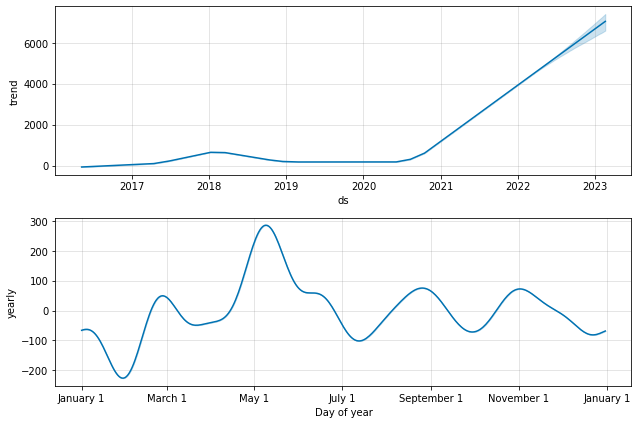

In [17]:
df_eth = pd.read_csv("Gemini_ETHUSD_day.csv", usecols = ['Date','Close'])
df_eth.index = df_eth.index[::-1]
df_eth = df_eth.reindex(index=df_eth.index[::-1])
df_date = [None] * len(df_eth['Date'])
for index, i in enumerate(df_eth['Date']):
   df_date[index] = i[6:10] + '-'+ i[3:5] + '-' + i[0:2]
df_eth['Date'] = df_date
df_eth.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)
model1_eth = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'additive', growth = 'linear')
model1_eth.fit(df_eth)
future1_eth = model1_eth.make_future_dataframe(periods = 365)
forecast1_eth = model1_eth.predict(future1_eth)
fig1_eth = model1_eth.plot_components(forecast1_eth)

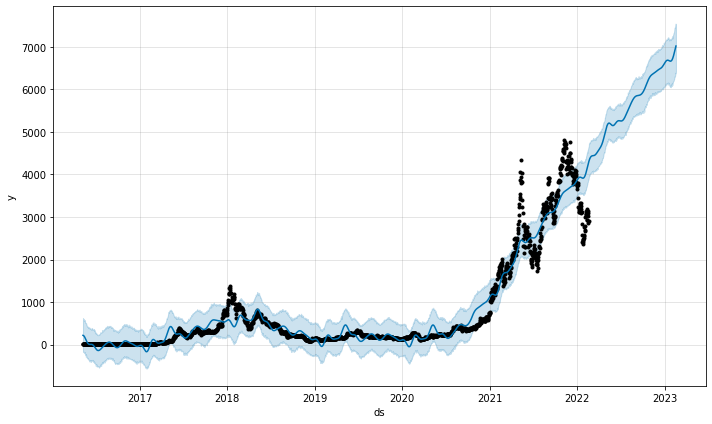

In [18]:
#additive model
fig2_eth = model1_eth.plot(forecast1_eth)

In [ ]:
#multiplicative model

Initial log joint probability = -55.0588
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5582.87    0.00576056       821.721           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5689.7     0.0189392       1012.07           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5713.98     0.0196946       1225.18           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5733.98     0.0207047       1294.45      0.3022           1      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5753.74    0.00572042       281.526           1           1      600   
    Iter      log prob        ||dx||      ||grad||       alpha  

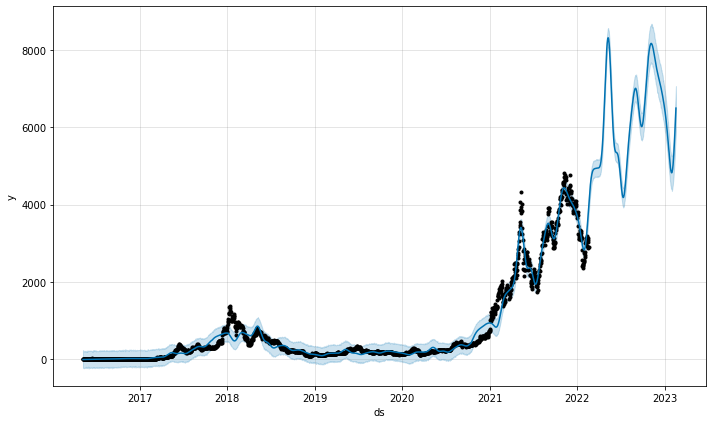

In [19]:
model2_eth = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2_eth.fit(df_eth)
future2_eth = model2_eth.make_future_dataframe(periods = 365)
forecast2_eth = model2_eth.predict(future2_eth)
fig3_eth = model2_eth.plot(forecast2_eth)

In [ ]:
#LiteCoin

Initial log joint probability = -13.9349
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2590.17     0.0117717        463.04      0.3481           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2622.67    0.00320883       154.625       2.093      0.2093      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       2632.26   0.000396316       174.049   1.154e-06       0.001      333  LS failed, Hessian reset 
     299       2639.04   0.000930142        148.49      0.2372      0.2372      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       2641.77   0.000467416        188.29   5.141e-06       0.001      524  LS failed, Hessian reset 
     399       2641.81   1.18659e-05       46.9718           1           1      558   
    Iter      log pro

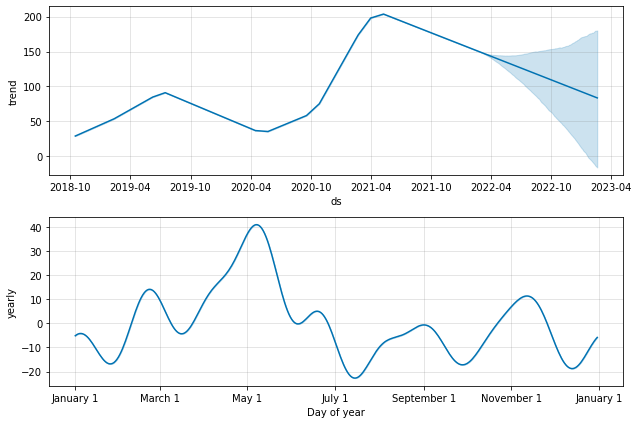

In [20]:
df_ltc = pd.read_csv("Gemini_LTCUSD_day.csv", usecols = ['Date','Close'])
df_ltc.index = df_ltc.index[::-1]
df_ltc = df_ltc.reindex(index=df_ltc.index[::-1])
df_date = [None] * len(df_ltc['Date'])
for index, i in enumerate(df_ltc['Date']):
   df_date[index] = i[6:10] + '-'+ i[3:5] + '-' + i[0:2]
df_ltc['Date'] = df_date
df_ltc.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)
model1_ltc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'additive', growth = 'linear')
model1_ltc.fit(df_ltc)
future1_ltc = model1_ltc.make_future_dataframe(periods = 365)
forecast1_ltc = model1_ltc.predict(future1_ltc)
fig1_ltc = model1_ltc.plot_components(forecast1_ltc)

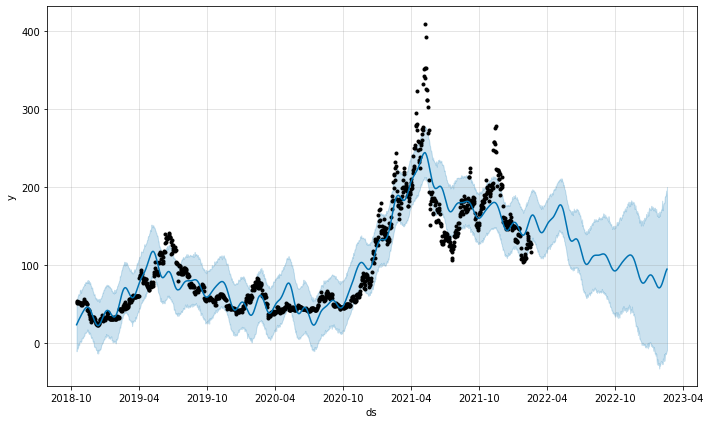

In [21]:
#litecoin model
fig2_ltc = model1_ltc.plot(forecast1_ltc)

Initial log joint probability = -13.9349
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2809.6      0.039186       473.472       4.863     0.04863      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2876.41     0.0668904       315.144      0.7238           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       2876.45   0.000254576       233.091   8.078e-07       0.001      288  LS failed, Hessian reset 
     299       2901.48    0.00484081       225.535      0.2152           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2913.1      0.109707        800.84           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     428       2924.87   0.000246992    

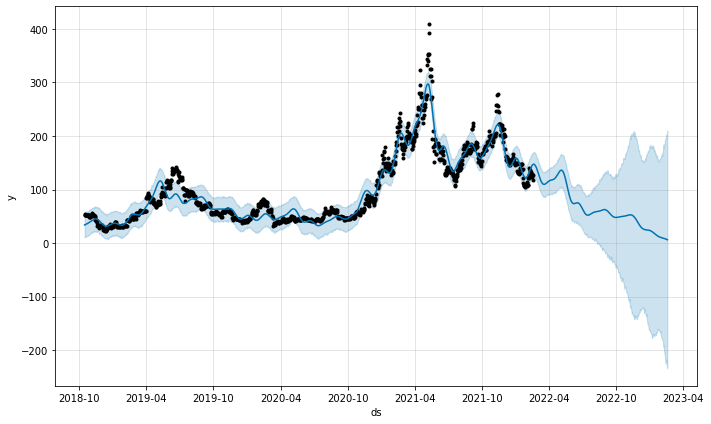

In [22]:
#multiplicative model
model2_ltc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2_ltc.fit(df_ltc)
future2_ltc = model2_ltc.make_future_dataframe(periods = 365)
forecast2_ltc = model2_ltc.predict(future2_ltc)
fig3_ltc = model2_ltc.plot(forecast2_ltc)